In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel('Credit_Ratings_development_CTF_v0.xlsx')
df.tail()

,Fitch_grade,Fitch_observed_DR,Moodys_grade,Moodys_observed_DR,SnP_grade,SnP_observed_DR
16,CCC+,0.2212,Caa1,0.0400,CCC+,0.2708
17,CCC,0.2212,Caa2,0.0817,CCC,0.2708
18,CCC-,0.2212,Caa3,0.1815,CCC-,0.2708
19,CC,0.2212,Ca,0.2813,CC,0.2708
20,C,0.2212,C,0.2813,NaN,NaN


# Fitch_observed_DR

In [12]:
y = df['Fitch_observed_DR'].to_numpy()
x = np.arange(len(y))


In [25]:
n = len(y)

dd = 3
E  = np.eye(n)
I  = np.eye(n)
D3 = np.diff(E, n = dd, axis=0)
D1 = np.diff(E, n = 1, axis=0)
la = 10
kp = 5000

# Monotone smoothing
ws = np.zeros(n - 1)

for it in range(dd*5):
    Ws      = np.diag(ws * kp)
    mon_cof = np.linalg.solve(E + la * D3.T @ D3 + D1.T @ Ws @ D1, y)
z  = np.sort(mon_cof)

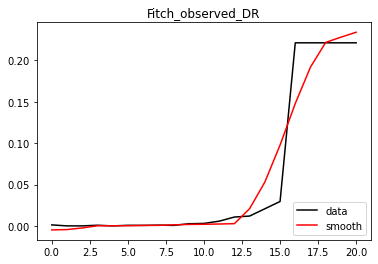

In [26]:
# Plots
plt.figure()
plt.plot(x, y, color = 'k', label = 'data')
plt.plot(x, z, color = 'red', label = 'smooth')
plt.legend(loc="lower right")
plt.title('Fitch_observed_DR')
plt.show()

# Moodys_observed_DR

In [27]:
y = df['Moodys_observed_DR'].to_numpy()
y

array([0.    , 0.    , 0.    , 0.0004, 0.0006, 0.0004, 0.0006, 0.0012,
       0.0016, 0.0022, 0.004 , 0.0068, 0.0127, 0.0182, 0.0281, 0.0437,
       0.04  , 0.0817, 0.1815, 0.2813, 0.2813])

In [34]:
 x = np.arange(len(y))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [35]:
n = len(y)

dd = 3
E  = np.eye(n)
I  = np.eye(n)
D3 = np.diff(E, n = dd, axis=0)
D1 = np.diff(E, n = 1, axis=0)
la = 10
kp = 5000

# Monotone smoothing
ws = np.zeros(n - 1)

for it in range(dd*5):
    Ws      = np.diag(ws * kp)
    mon_cof = np.linalg.solve(E + la * D3.T @ D3 + D1.T @ Ws @ D1, y)
z  = np.sort(mon_cof)

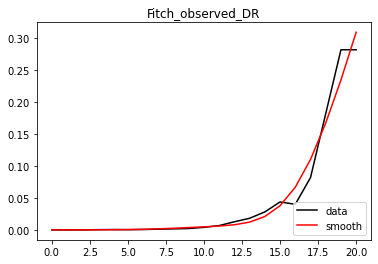

In [36]:
# Plots
plt.figure()
plt.plot(x, y, color = 'k', label = 'data')
plt.plot(x, z, color = 'red', label = 'smooth')
plt.legend(loc="lower right")
plt.title('Fitch_observed_DR')
plt.show()